# Prediction of Energy Output in Power Plant

Project Details : <br>
The study covers in-depth analysis of Regression algorithms such as simple linear regression, Multiple linear regression, Polynomial and Interactive variable regression. 

Learnings : <br>
I got an insight on how to analyse the OLS Model output results, t test, p values, R squared values and their importance. Polynomial and Interaction terms and their importance while performing linear regression. 

In [2]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn.metrics as metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

## Reading the data

In [3]:
data = pd.read_excel('Folds5x2_pp.xlsx',sheet_name='Sheet1')
data_bkp = pd.read_excel('Folds5x2_pp.xlsx',sheet_name='Sheet1')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
#Printing the names of each column
print(data.columns[0]+": Temperature")
print(data.columns[1]+" : Exhaust Vacuum")
print(data.columns[2]+": Ambient Pressure")
print(data.columns[3]+": Relative humidity")
print(data.columns[4]+": Net Hourly Electrical Energy Output")


AT: Temperature
V : Exhaust Vacuum
AP: Ambient Pressure
RH: Relative humidity
PE: Net Hourly Electrical Energy Output


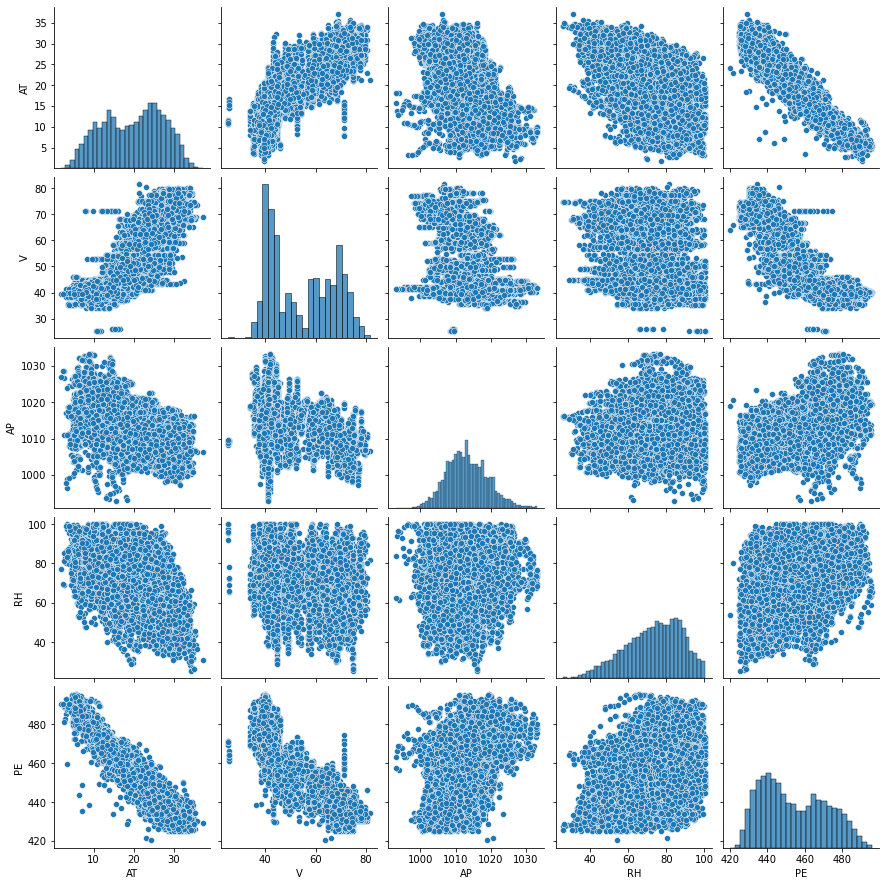

In [6]:
#Scatter plot for all features in the data  
sns.pairplot(data)
plt.show()

## Data Summary

In [7]:
median = []
for i in data.columns:
    median.append(np.median(data[i]))

print("Median :",median)
data.describe()

Median : [20.345, 52.08, 1012.94, 74.975, 451.54999999999995]


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Simple Linear Regression for each Independent Variable 

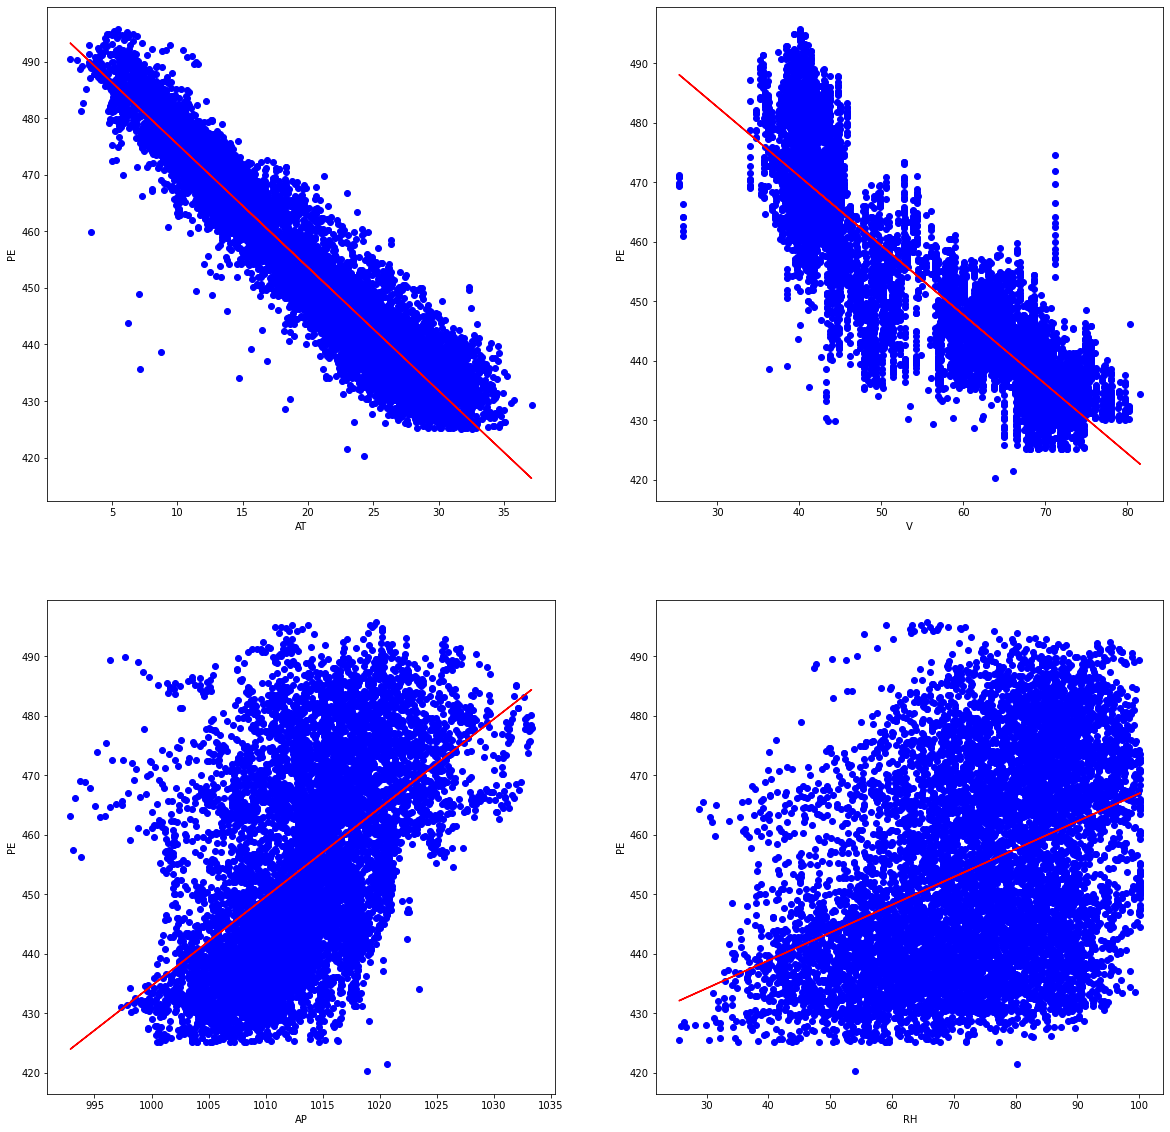

coefficient of determination: [0.8989678302923797, 0.7639042595741513, 0.26209986304748056, 0.1342776722866561]
coefficient of correlation:   [-0.9481284704167602, -0.8697803096577887, 0.5184290273615738, 0.38979409979010193]


In [8]:
plt.figure(figsize=(20,20))
corr = []
r_sq = []
y=data['PE']
j=1
for i in data.columns[:-1]:
    X=data[i]
    X=np.array(X).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=True)
    model = LinearRegression()
    model.fit(X_train, y_train)
    plt.subplot(2, 2, j)
    plt.scatter(data[i], y, color = "blue",marker = "o")
    y_pred = model.intercept_ + model.coef_*data[i]
    plt.plot(data[i], y_pred, color = "red")
    plt.xlabel(i)
    plt.ylabel('PE')
    
    r_sq.append(model.score(X_test, y_test))
    corr.append(np.corrcoef(x=data[i],y=y)[0][1])
    j=j+1
plt.show()
print('coefficient of determination:', r_sq)
print('coefficient of correlation:  ', corr)

It can be seen that Temperature and Exhaust Vaccum have a stronger linear relationship with the Output Energy.

We further extend our analysis into the details of the linear regression models for each independent variable using Ordinary Least Squares model


<b> Simple Linear Regression for Temperature </b>

In [9]:
Y=data['PE']
X=data['AT']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
summary = results.summary()
AT_Coeff = results.params['AT']
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:19:25   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

The R-sqaured value is 0.899 which means the regression line fits well with the data. The p-value for AT is also 0 so we can reject the Null Hypothesis that "AT has no relationship with Energy"

Analysing the Residual Plot and Outliers :-

Text(0, 0.5, 'Studentized Residuals')

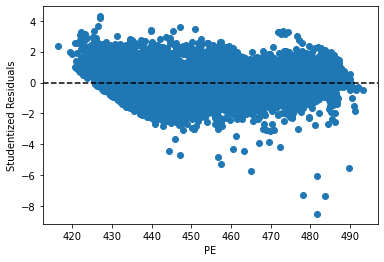

In [10]:
stud_res = results.outlier_test()
y_pred = results.predict(X)
y = stud_res['student_resid']
#create scatterplot of predictor variable vs. studentized residuals
plt.scatter(y_pred, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('PE')
plt.ylabel('Studentized Residuals') 

Any point above +4 or below -4 is considered to be an outlier in the above plot. 

<b> Simple Linear Regression for Vaccum </b>

In [11]:
X=data['V']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
summary = results.summary()
V_Coeff = results.params['V']
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:19:54   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

The R sqaured value is 0.757 which indicates that the independent variable Vaccum has a high influence on the dependent variable Energy Output

Text(0, 0.5, 'Studentized Residuals')

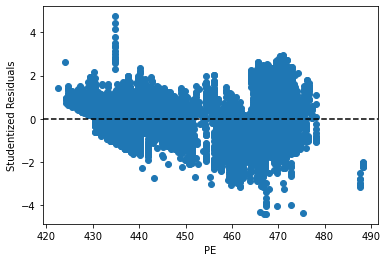

In [12]:
stud_res = results.outlier_test()
y_pred = results.predict(X)
y = stud_res['student_resid']
#create scatterplot of predictor variable vs. studentized residuals
plt.scatter(y_pred, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('PE')
plt.ylabel('Studentized Residuals') 

We see a few outliers in the Residual plot 

<b> Simple Linear Regression for Pressure </b>

In [13]:
X=data['AP']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
summary = results.summary()
AP_Coeff = results.params['AP']
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:20:22   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

The R sqaured value is very low for Pressure. Hence, we can conclude that it has minimal influence on the output variable, although the t value and p value indicate that the Pressure variable is statistically significant

Text(0, 0.5, 'Studentized Residuals')

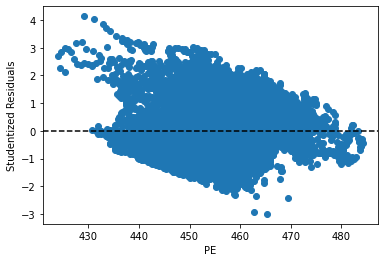

In [14]:
stud_res = results.outlier_test()
y_pred = results.predict(X)
y = stud_res['student_resid']
#create scatterplot of predictor variable vs. studentized residuals
plt.scatter(y_pred, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('PE')
plt.ylabel('Studentized Residuals') 

We have very minimal no of outliers in this case.

<b> Simple Linear Regression for Relative Humidity </b>

In [15]:
X=data['RH']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
summary = results.summary()
RH_Coeff = results.params['RH']
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:20:51   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

The R square value is almost close to 0 which implies that the relationship between Relative Humidity and Energy is weak. However, the p value for the RH coefficient is 0 which shows that it is highly significant. 

Text(0, 0.5, 'Studentized Residuals')

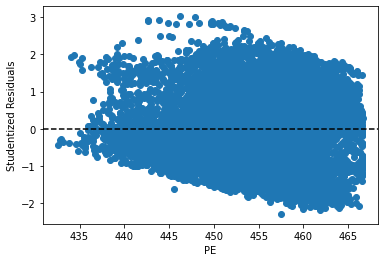

In [16]:
stud_res = results.outlier_test()
y_pred = results.predict(X)
y = stud_res['student_resid']
#create scatterplot of predictor variable vs. studentized residuals
plt.scatter(y_pred, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('PE')
plt.ylabel('Studentized Residuals') 

<b> Multiple Linear Regression with all features</b>

In [17]:
X=data[['AT','V','AP','RH']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:21:19   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

R squared value is almost close to 1 which implies that the there is a strong relationship between the input features and the output. 
Although, there might be a strong multicollinearity we observe that the p values are 0 and t values lie in the critical region. Hence, we have sufficient evidence to reject the Null Hypothesis. 

<b> Simple Linear Regression Coefficients Vs Multiple Regression Coefficients <b>

Text(0, 0.5, 'Univariate Regression Coefficients')

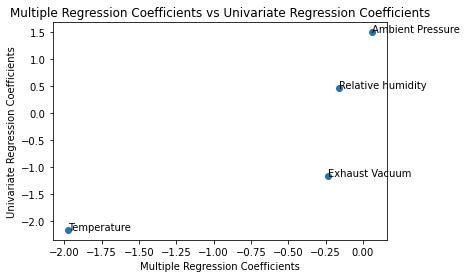

In [18]:
#Coefficients of Multiple Regression 
AT_Coeff_mr = results.params['AT']
V_Coeff_mr = results.params['V']
AP_Coeff_mr = results.params['AP']
RH_Coeff_mr = results.params['RH']
MR_features = [AT_Coeff_mr,V_Coeff_mr,AP_Coeff_mr,RH_Coeff_mr]

#Coefficients of Simple Linear Regression 
SR_features = [AT_Coeff,V_Coeff,AP_Coeff,RH_Coeff]

features = ['Temperature','Exhaust Vacuum','Ambient Pressure','Relative humidity']
plt.scatter(MR_features,SR_features)

for i, j in enumerate(features):
    plt.annotate(j, (MR_features[i], SR_features[i]))
    
plt.title("Multiple Regression Coefficients vs Univariate Regression Coefficients")
plt.xlabel("Multiple Regression Coefficients")
plt.ylabel("Univariate Regression Coefficients")

The regression coefficient values definitely change when compared between univariate and multiple regression because - In the multiple regression, the coefficient values are affected by the other independent variables taken into account.

<b> Check for Non Linear Relationship </b>

In the below regression outputs, we look for statistical significance for non linear relationships between the input variables and output.

1. Temperature 

In [19]:
model = smf.ols('PE ~ AT + I(AT**2) + I(AT**3)',data=data) # Regression Line : b0+b1X+b2*X^2+b3*X^3
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:21:20   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

All the coefficients are statistically significant in the above results. And a very good R squared value.

2. Vacuum 

In [20]:
model = smf.ols('PE ~ V + I(V**2) + I(V**3)',data=data)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:21:20   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

In the above results, we can see that V^2 coefficient is statistically insignificant since its t value lies in the rejection region. Also, p value is greater than 0.001. Additionally, V^3 is also statistically insignificant because of the larger p value

3. Pressure

In [21]:
model = smf.ols('PE ~ AP + I(AP**2) + I(AP**3)',data=data)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:21:20   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

Although the R sqaured value is minimal, all the coefficients are statistically significant.

4. Relative Humidity

In [22]:
model = smf.ols('PE ~ RH + I(RH**2) + I(RH**3)',data=data)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:21:20   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

Although the R sqaured value is minimal, all the coefficients are statistically significant.

<b> Linear Regression for Pairwise Interaction Terms </b>

In [23]:
model = smf.ols('PE ~ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH',data=data)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:21:20   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

The R squared value is high and thus the inpendent variables do have an influence on the output variable. <br>
<b> AT, AT:AP, V:RH, AP, RH, V:RH, AP:RH </b> coefficients are statistically insignificant. 

### Linear Regression with Test and Train Data Sets 

In [24]:
#Simple Linear Regression with all predictors
X=data[['AT','V','AP','RH']]
y=data['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

19.936518810006316


### Multiple Regression with statistically significant terms from - Polynomial features and Interaction Variables

In [36]:
train_data = X_train.copy()
train_data['PE'] = y_train

In [38]:
model = smf.ols('PE ~ AT + V + RH + AP+ AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH\
  + I(V**2) + I(V**3) + I(AT**2) + I(AT**3)+ I(AP**2) + I(AP**3) + I(RH**2) + I(RH**3)',data=train_data)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     5996.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:34:02   Log-Likelihood:                -19165.
No. Observations:                6697   AIC:                         3.837e+04
Df Residuals:                    6679   BIC:                         3.849e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0240      0.004     -5.495      0.0

We remove the statistically insignificant terms from the above results and re-run the analysis.

In [44]:
model = smf.ols('PE ~ RH + AP+ AP*RH\
  + I(V**2) + I(V**3) + I(AT**2) + I(AT**3)+ I(AP**2) + I(AP**3) ',data=train_data)
results = model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.207e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:40:30   Log-Likelihood:                -19339.
No. Observations:                6697   AIC:                         3.870e+04
Df Residuals:                    6688   BIC:                         3.876e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0329      0.003    -10.153      0.0

In [45]:
y_pred = results.predict(X_test)
print(mean_squared_error(y_test, y_pred))

18.282000268910043


Therefore, we can see that mean squared error is reduced for OLS Model with respective interactive terms and non linear terms